In [25]:
import numpy as np
import pandas as pd
import os
import sys
from os import listdir
from os.path import isfile, join, exists
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt

import importlib

from helpers import helpers

importlib.reload(helpers)


<module 'helpers.helpers' from '/user_data/jacobpri/Project/BOLD5000-GLMs/GLMsingle_paper/helpers/helpers.py'>

In [26]:
datasets = ['NSD','B5K']

info = dict()
info['B5K'] = dict()
info['NSD'] = dict()

info['B5K']['subjs'] = ['CSI1','CSI2','CSI3','CSI4']
info['NSD']['subjs'] = ['subj01','subj02','subj03','subj04']

info['methods'] = ['assumehrf', 'fithrf', 'fithrf_glmdenoise', 'fithrf_glmdenoise_rr']

In [27]:
reliability = dict()
masks = np.load('masks.npy',allow_pickle=True).item()

# check to be sure all the datafiles exist
for ds in datasets:
    
    reliability[ds] = dict()
    
    for subj in info[ds]['subjs']:
        
        subj_version_list = []
        
        reliability[ds][subj] = dict()
            
        for method in info['methods']:
        
            metric_savefn = f'reliability_data/{ds}_{subj}_{method}_reliability.npy'
            
            rel = np.load(metric_savefn)
            
            mask = masks[ds][subj]==1
            
            if np.ndim(rel) == 3:
                rel = rel[mask==1]
                
            print(ds,method,subj,rel.shape)
            
            reliability[ds][subj][method] = rel
            
            subj_version_list.append(rel)
                       
        reliability[ds][subj]['mean'] = np.mean(np.stack(subj_version_list,axis=1),axis=1)
        
        

NSD assumehrf subj01 (29723,)
NSD fithrf subj01 (29723,)
NSD fithrf_glmdenoise subj01 (29723,)
NSD fithrf_glmdenoise_rr subj01 (29723,)
NSD assumehrf subj02 (25655,)
NSD fithrf subj02 (25655,)
NSD fithrf_glmdenoise subj02 (25655,)
NSD fithrf_glmdenoise_rr subj02 (25655,)
NSD assumehrf subj03 (28033,)
NSD fithrf subj03 (28033,)
NSD fithrf_glmdenoise subj03 (28033,)
NSD fithrf_glmdenoise_rr subj03 (28033,)
NSD assumehrf subj04 (23155,)
NSD fithrf subj04 (23155,)
NSD fithrf_glmdenoise subj04 (23155,)
NSD fithrf_glmdenoise_rr subj04 (23155,)
B5K assumehrf CSI1 (17116,)
B5K fithrf CSI1 (17116,)
B5K fithrf_glmdenoise CSI1 (17116,)
B5K fithrf_glmdenoise_rr CSI1 (17116,)
B5K assumehrf CSI2 (17481,)
B5K fithrf CSI2 (17481,)
B5K fithrf_glmdenoise CSI2 (17481,)
B5K fithrf_glmdenoise_rr CSI2 (17481,)
B5K assumehrf CSI3 (15954,)
B5K fithrf CSI3 (15954,)
B5K fithrf_glmdenoise CSI3 (15954,)
B5K fithrf_glmdenoise_rr CSI3 (15954,)
B5K assumehrf CSI4 (16707,)
B5K fithrf CSI4 (16707,)
B5K fithrf_glmdenoi

In [28]:
df = pd.read_csv('nsd_stim_info_merged.csv')
df[:5]

,Unnamed: 0,Unnamed: 0.1,cocoId,cocoSplit,cropBox,loss,nsdId,flagged,BOLD5000,shared1000,...,subject5_rep2,subject6_rep0,subject6_rep1,subject6_rep2,subject7_rep0,subject7_rep1,subject7_rep2,subject8_rep0,subject8_rep1,subject8_rep2
0,0,0,532481,val2017,"(0, 0, 0.1671875, 0.1671875)",0.100000,0,False,False,False,...,0,0,0,0,0,0,0,0,0,0
1,1,1,245764,val2017,"(0, 0, 0.125, 0.125)",0.000000,1,False,False,False,...,0,0,0,0,13985,14176,28603,0,0,0
2,2,2,385029,val2017,"(0, 0, 0.125, 0.125)",0.000000,2,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3,3,3,311303,val2017,"(0, 0, 0.16640625, 0.16640625)",0.125000,3,False,False,False,...,0,0,0,0,0,0,0,0,0,0
4,4,4,393226,val2017,"(0, 0, 0.125, 0.125)",0.133333,4,False,False,False,...,0,13720,22861,23023,0,0,0,0,0,0


In [6]:
overlap_df = df.loc[np.logical_and(df['BOLD5000'] == True, df ['shared1000'] == True)]
print(overlap_df.shape)


(1000, 42)


In [29]:
shared_df = df.loc[df['shared1000'] == True]
shared_imgs = shared_df['cocoId'].values


In [30]:

intersect_imgs = np.load('nsd_b5k_overlap_cocos.npy')

print(len(intersect_imgs))
print(intersect_imgs)

241
['30109' '303133' '55514' '231851' '524646' '480601' '400581' '239828'
 '474024' '354045' '447182' '22256' '468394' '53778' '551164' '497797'
 '443575' '543254' '174504' '573830' '21718' '149221' '169262' '401699'
 '201969' '369171' '23392' '143245' '143594' '575971' '22627' '74828'
 '574784' '285588' '203937' '332574' '539395' '57631' '318444' '38801'
 '203615' '100396' '576789' '131763' '505486' '335688' '80987' '263276'
 '461187' '189388' '454915' '563961' '90827' '439241' '180410' '558788'
 '430850' '292845' '39196' '81841' '373970' '434069' '92001' '61266'
 '398540' '570785' '96161' '101069' '313480' '447130' '150196' '59194'
 '559225' '335824' '532520' '366396' '154011' '100599' '312003' '166504'
 '161062' '420713' '381961' '43150' '69705' '384235' '525790' '364806'
 '116603' '284089' '270278' '70421' '495387' '266622' '463620' '448401'
 '559816' '101952' '282707' '115649' '424138' '147694' '515102' '10743'
 '98480' '309135' '6053' '423488' '27002' '55402' '26388' '135316'
 '

In [31]:
RDVs = np.load('RSA-RDVs.npy',allow_pickle=True).item()

In [33]:
rels = [-1,0,0.05,0.1,0.15,0.2,0.25,0.3]
rel_versions = ['assumehrf','fithrf','fithrf_glmdenoise','fithrf_glmdenoise_rr']
beta_versions = ['TYPEA_ASSUMEHRF','TYPEB_FITHRF','TYPEC_FITHRF_GLMDENOISE','TYPED_FITHRF_GLMDENOISE_RR']
colors = ['dodgerblue','orange','limegreen','tomato']

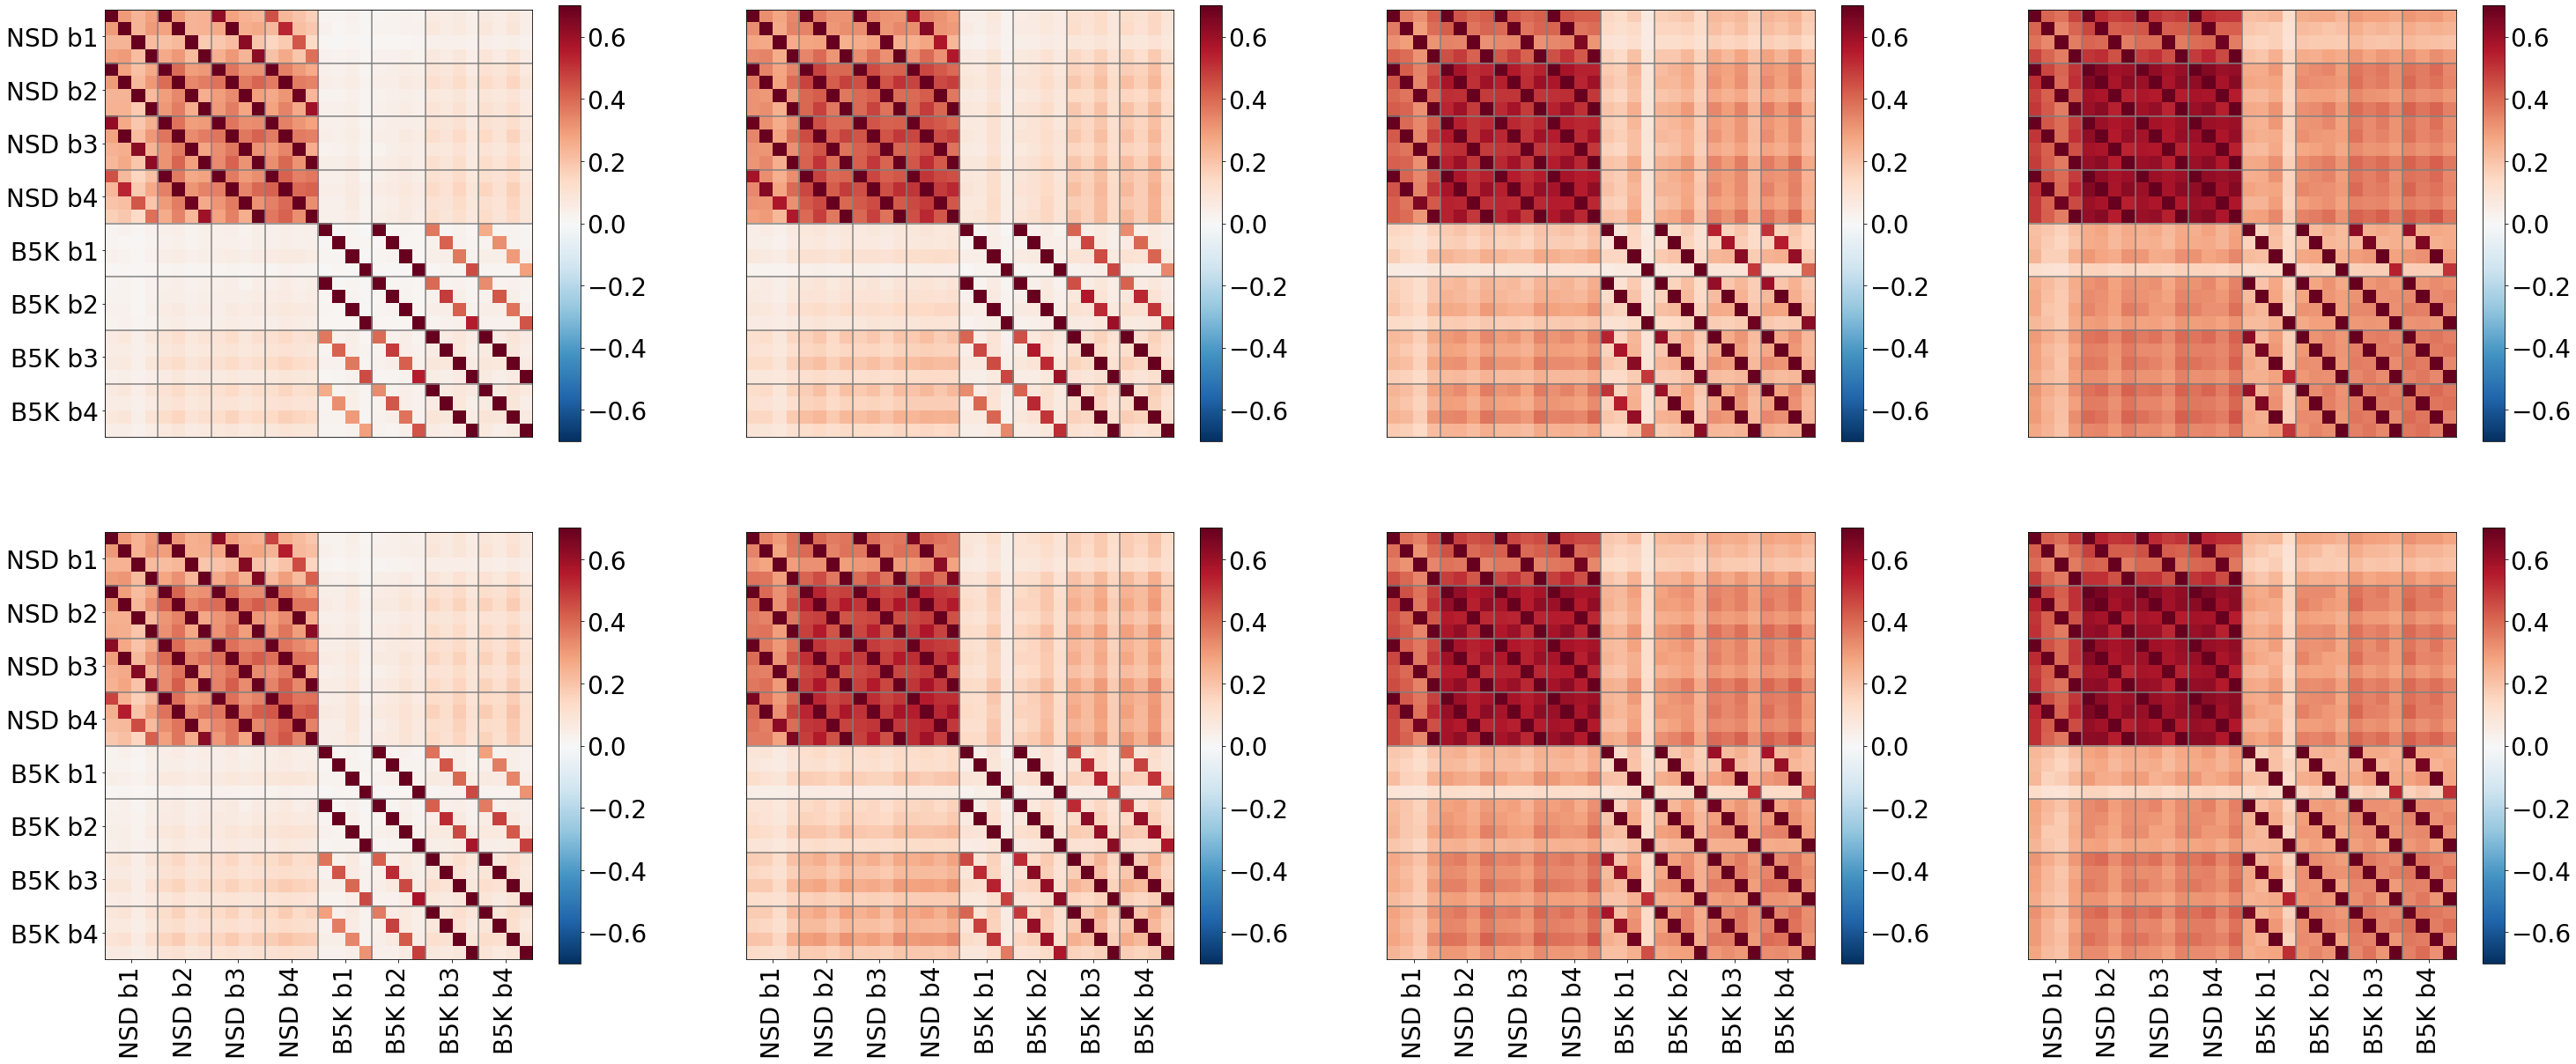

In [34]:
plt.figure(figsize=(50,20))

vlabels = [f'b{x}' for x in range(1,5)]
c=1

order = np.array([0,2,4,6,1,3,5,7])
rels_ = np.array(rels)[order]

for rel in rels_:
    
    plt.subplot(2,4,c)

    all_rdvs = []
    labels = []

    for ds in ['NSD','B5K']:

        if ds == 'NSD':
            subjs = [f'subj0{n}' for n in range(1,5)]
        else:
            subjs = [f'CSI{n}' for n in range(1,5)]
        
        v = 0
        for version in rel_versions:

            for subj in subjs:

                all_rdvs.append(RDVs[ds][version][subj][rel])
            labels.append(f"{ds} {vlabels[v]}")
            v+=1

    all_rdvs = np.vstack(all_rdvs)

    uber_rsm = 1 - squareform(pdist(all_rdvs,'correlation'))

    plt.imshow(uber_rsm,clim=(-0.7,0.7),cmap='RdBu_r')
    cbar = plt.colorbar()
    cbar.ax.tick_params(labelsize=28) 
    if c > 4:
        plt.xticks(np.arange(0,uber_rsm.shape[0],4)+1.5,labels,rotation=90,fontsize=28)
    else:
        plt.xticks([])
        
    if np.mod(c,4)==1:
        plt.yticks(np.arange(0,uber_rsm.shape[0],4)+1.5,labels,fontsize=28)
    else:
        plt.yticks([])
        
    plt.ylim([uber_rsm.shape[0]-0.5,-0.5])
    plt.vlines(np.arange(0,uber_rsm.shape[0],4)-0.5,-0.5,uber_rsm.shape[0]-0.5,color='gray')
    plt.hlines(np.arange(0,uber_rsm.shape[0],4)-0.5,-0.5,uber_rsm.shape[0]-0.5,color='gray')
    c+=1

In [35]:
def within_dataset_RDV_corrs(ds, rel, versions):
  
    all_rdvs = []
    
    if ds == 'NSD':
        subjs = [f'subj0{n}' for n in range(1,5)]
    else:
        subjs = [f'CSI{n}' for n in range(1,5)]
           
    for version in versions:
        this_rdvs = []
        
        for subj in subjs:
            this_rdvs.append(RDVs[ds][version][subj][rel])

        this_rdvs = np.vstack(this_rdvs)
        
        all_rdvs.append(1-pdist(this_rdvs,'correlation'))
                                    
    all_rdvs = np.stack(all_rdvs,axis=1)
    
    return all_rdvs


In [36]:
def between_dataset_RDV_corrs(rel, versions):
    
    version_between_ds_corrs = []
    
    for version in versions:
        ds_rdvs = []
        
        for ds in ['NSD','B5K']:
            
            this_rdvs = []
            
            if ds == 'NSD':
                subjs = [f'subj0{n}' for n in range(1,5)]
            else:
                subjs = [f'CSI{n}' for n in range(1,5)]

            for subj in subjs:
                this_rdvs.append(RDVs[ds][version][subj][rel])    
                
            ds_rdvs.append(np.vstack(this_rdvs))
            
        nA = ds_rdvs[0].shape[0]
        nB = ds_rdvs[1].shape[0]
        
        this_between_ds_corrs = np.zeros((nA,nB))
            
        for a in range(nA):
            for b in range(nB):
                this_between_ds_corrs[a,b] = np.corrcoef(ds_rdvs[0][a],ds_rdvs[1][b])[1,0]
                
        version_between_ds_corrs.append(this_between_ds_corrs.reshape(-1))
        
    version_between_ds_corrs = np.stack(version_between_ds_corrs,axis=0).T
        
    return version_between_ds_corrs


In [37]:
# analysis 1: within-dataset, pairwise subject comparisons by version

RSA = dict()

colors = ['dodgerblue','orange','limegreen','tomato']

for rel in rels:
    
    RSA[rel] = dict()
    
    for q in range(3):

        if q == 0:
            RSA[rel]['NSD'] = within_dataset_RDV_corrs('NSD',rel,rel_versions)
            
        elif q == 1:
            RSA[rel]['B5K'] = within_dataset_RDV_corrs('B5K',rel,rel_versions)
            
        else:
            RSA[rel]['between'] = between_dataset_RDV_corrs(rel, rel_versions)


/home/jacobpri/Gating/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


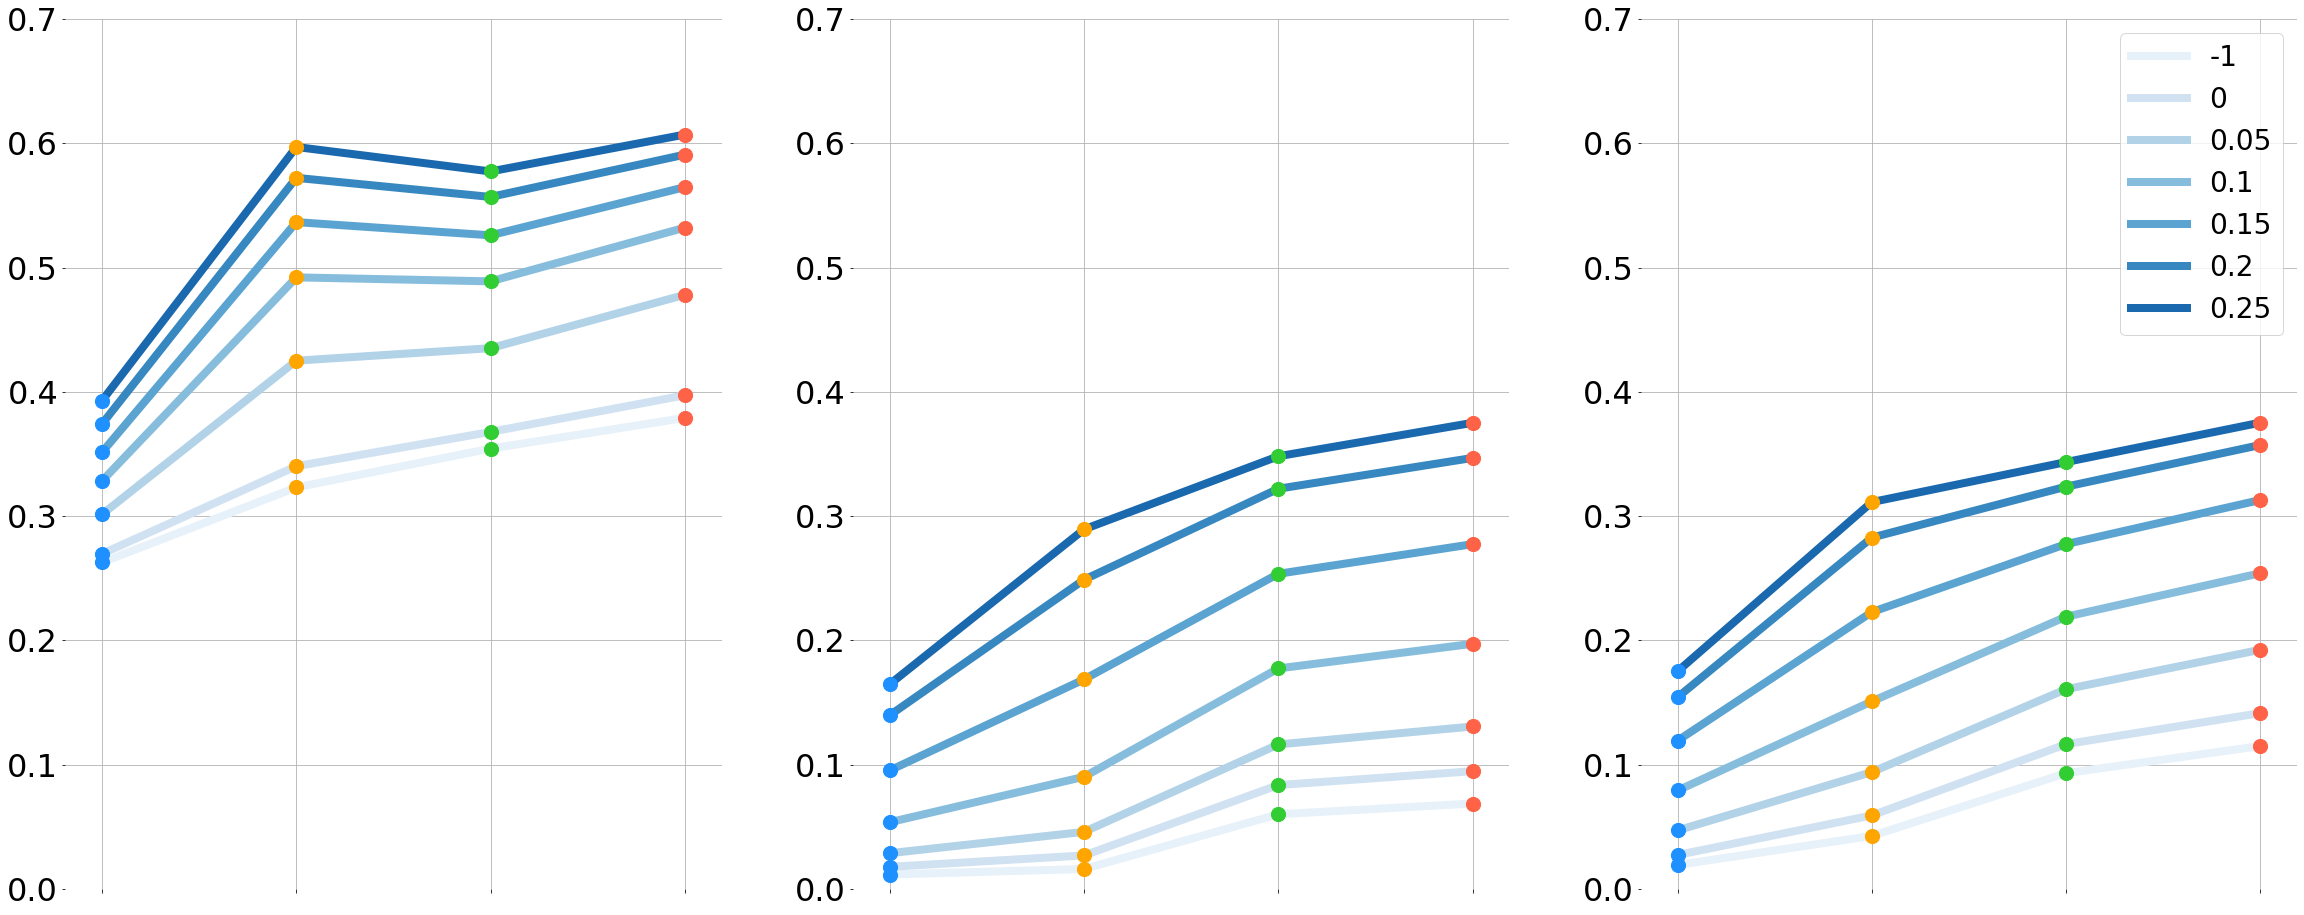

In [38]:
plt.figure(figsize=(40,16))

rels_ = rels[:-1]

from matplotlib import cm
gray_map = cm.Blues(range(256))

gs = list(range(20,236,216//len(rels_)))
g=0

fields = list(RSA[0].keys())
for rel in rels_:
    
    for s in range(3):
        
        plt.subplot(1,3,s+1)
        plt.plot(np.mean(RSA[rel][fields[s]],axis=0),color=gray_map[gs[g]],linewidth=8,label=rel)
        for v in range(len(rel_versions)):
            plt.scatter(v,np.mean(RSA[rel][fields[s]],axis=0)[v],200,color=colors[v],zorder=10)
        plt.ylim([0,0.7])
        plt.xticks(np.arange(len(rel_versions)),['']*len(rel_versions))
        plt.yticks(fontsize=32)
        plt.grid('on')
        
        for spine in plt.gca().spines.values():
            spine.set_visible(False)
            
    g+=1
             
plt.legend(fontsize=28,loc='upper right')